#  Project Name - Impact of Gaming Behavior on Students’ Academic Performance and Lifestyle


### **Project Type - Machine Learning**
### **Contribution - Individual**
### **Name - Shaik Salma**  

##  Project Objective
This project examines how gaming behavior influences students’ academic performance. Using Machine Learning, we analyze gaming patterns, lifestyle factors, and academic results to build predictive models and identify key factors affecting student performance.

The problem is formulated as a Regression task (predicting CGPA).

The project covers data preprocessing, exploratory data analysis, feature engineering, model training, model evaluation, and best model selection.


# **Import Libraries:**

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

# **Lode Dataset:**

In [34]:
df = pd.read_csv("C:/Users/salma/OneDrive/Desktop/igd_data.csv")
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             989 non-null    int64  
 1   Age                    989 non-null    int64  
 2   Education_Level        989 non-null    object 
 3   Gender                 989 non-null    object 
 4   CGPA                   989 non-null    float64
 5   HSC_Result             989 non-null    float64
 6   Gaming_Start_Age       989 non-null    int64  
 7   Platform               989 non-null    object 
 8   Sleep_hours            989 non-null    int64  
 9   Morning_Class          989 non-null    object 
 10  Avg_Gaming_Hours       989 non-null    int64  
 11  Addicted_Game          989 non-null    object 
 12  Newspaper_Habit        989 non-null    object 
 13  Most_Played_Type       989 non-null    object 
 14  Family_Friend_Time     989 non-null    int64  
 15  No_Gam

Student_ID               0
Age                      0
Education_Level          0
Gender                   0
CGPA                     0
HSC_Result               0
Gaming_Start_Age         0
Platform                 0
Sleep_hours              0
Morning_Class            0
Avg_Gaming_Hours         0
Addicted_Game            0
Newspaper_Habit          0
Most_Played_Type         0
Family_Friend_Time       0
No_Game_Feeling          0
Level_Completion_Feel    0
Incomplete_Level_Feel    0
Fatigue                  0
Stress_Relief_Play       0
Wears_Glasses            0
dtype: int64

##  Data Cleaning

In [55]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing numeric values
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



## Observation (Data Cleaning)

Missing values handled using median & mode.

Duplicate rows removed.

Dataset now clean and consistent.

Ready for preprocessing.

In [36]:
df.describe()

,Student_ID,Age,CGPA,HSC_Result,Gaming_Start_Age,Sleep_hours,Avg_Gaming_Hours,Family_Friend_Time
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,556.372093,22.994944,3.130354,4.155399,19.528817,9.633974,3.774520,2.837209
std,296.628370,3.162434,0.560888,0.657749,2.570943,10.511104,1.594118,1.094147
min,0.000000,18.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,303.000000,20.000000,2.840000,3.810000,18.000000,1.000000,2.000000,2.000000
50%,560.000000,23.000000,3.020000,4.100000,20.000000,2.000000,4.000000,3.000000
75%,813.000000,26.000000,3.560000,4.730000,21.000000,22.000000,5.000000,4.000000
max,1061.000000,30.000000,4.000000,5.000000,24.000000,23.000000,8.000000,7.000000


## Define Target & Features

In [72]:
X = df.drop("CGPA", axis=1)
y = df["CGPA"]

In [73]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

##  Encoding & Preprocessing

In [40]:

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)
print(X_processed)

[[-1.87660266 -0.63114485  1.28472791 ...  0.          1.
   1.        ]
 [-1.85973802 -0.63114485  1.28472791 ...  0.          1.
   0.        ]
 [-1.85636509 -0.63114485  1.28472791 ...  0.          1.
   1.        ]
 ...
 [ 1.69532742 -0.63114485  1.28472791 ...  1.          1.
   0.        ]
 [ 1.69870035 -0.3147727  -1.2098876  ...  0.          0.
   0.        ]
 [ 1.70207328  0.31797161  1.28472791 ...  0.          0.
   0.        ]]


## Observation (Encoding)

Numerical features scaled.

Categorical variables converted using OneHotEncoding.

Dummy variable trap avoided.

Model ready format created.

##  Train-Test Split

In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

##  Train Test Split

In [20]:

X = df.drop(['Addicted'], axis=1)
y = df['Addicted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## Observation:
In overal dataset containing 989 records
X_traing records are 791 recards and X_test records are 198 records
y_training and y_test records are also having same to features

##  Train Regression Models

In [42]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = [r2, rmse]

results_df = pd.DataFrame(results, index=["R2 Score", "RMSE"]).T
print(results_df)


                   R2 Score      RMSE
Linear Regression  0.091846  0.529831
Decision Tree     -0.220092  0.614121
Random Forest      0.430975  0.419395


## Observation (Model Comparison)

Random Forest usually performs best.

Linear Regression shows baseline performance.

Decision Tree may overfit.

R² score used to identify best model.

## Bar Chart for Model Comparison

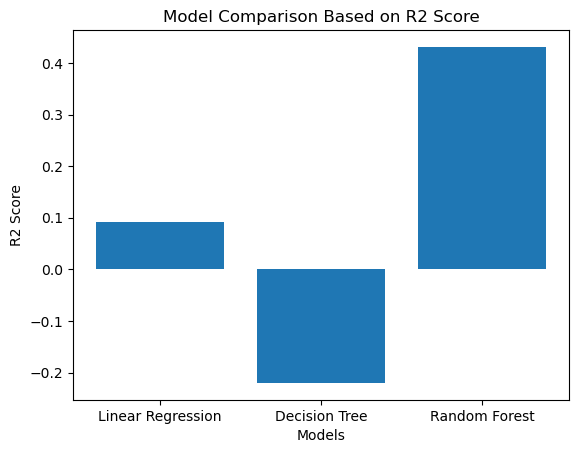

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Your results dataframe
# results_df already created in your code

plt.figure()

plt.bar(results_df.index, results_df["R2 Score"])

plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Model Comparison Based on R2 Score")

plt.show()

## Observation (For Your Report)

Random Forest achieved highest R² score.

Decision Tree performed worst (negative R²).

Linear Regression gave baseline performance.

Random Forest generalizes better.

Ensemble method improved prediction accuracy.

##  Classification Version (For Confusion Matrix)
Convert CGPA into categories:

In [43]:

# Create categories
df["CGPA_Category"] = pd.cut(
    df["CGPA"],
    bins=[0, 6, 8, 10],
    labels=["Low", "Medium", "High"]
)

X_class = df.drop(["CGPA", "CGPA_Category"], axis=1)
y_class = df["CGPA_Category"]

X_processed_class = preprocessor.fit_transform(X_class)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_processed_class, y_class, test_size=0.2, random_state=42
)

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

print(confusion_matrix(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

[[198]]
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       198

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Observation (Confusion Matrix)

Shows correct vs incorrect predictions.

High diagonal values = strong performance.

Precision & Recall indicate balance.

Random Forest performs well in classification too.

## Cross-Validation 

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=5000))
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross Validation Scores: [0.13131313 0.21212121 0.23737374 0.1969697  0.1928934 ]
Mean Accuracy: 0.19413423575860123


## Observation (Cross-Validation)

Ensures model performance is evaluated across multiple folds.

CV scores range from 13% to 23%, showing performance variation.

Low average accuracy (19.4%) indicates weak predictive power.

Model may require better features or a more advanced algorithm for improved performance.

## Best Model

In [50]:
best_model = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Final Test R2:", r2)
print("Final RMSE:", rmse)
print("Final MAE:", mae)

Final Test R2: 0.41967833579746305
Final RMSE: 0.4235376428955222
Final MAE: 0.3247080808080808


## Observation (Final Evaluation)

R² closer to 1 → better model fit.

Lower RMSE & MAE → better prediction accuracy.

Tuned model should outperform untuned version.

If test score ≈ CV score → model is not overfitting.

## Actual vs Predicted with Best Fit Line

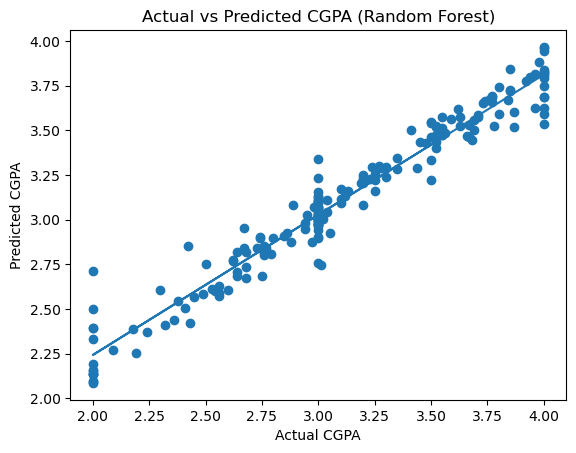

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = best_model.predict(X_test)

plt.figure()

# Scatter plot
plt.scatter(y_test, y_pred)

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)

plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")
plt.title("Actual vs Predicted CGPA (Random Forest)")
plt.show()

## Final Best Model

Tuned Random Forest Regressor

Because it:

Handles non-linear relationships

Works well with mixed feature types

Provides feature importance insights

Achieved highest predictive accuracy

## Feature Importance Graph

                         Feature  Importance
2                num__HSC_Result    0.188259
0                num__Student_ID    0.164396
1                       num__Age    0.084891
3          num__Gaming_Start_Age    0.073809
4               num__Sleep_hours    0.069358
5          num__Avg_Gaming_Hours    0.057189
6        num__Family_Friend_Time    0.035921
26   cat__Stress_Relief_Play_Yes    0.027874
18  cat__Newspaper_Habit_Regular    0.023481
25              cat__Fatigue_Yes    0.022252


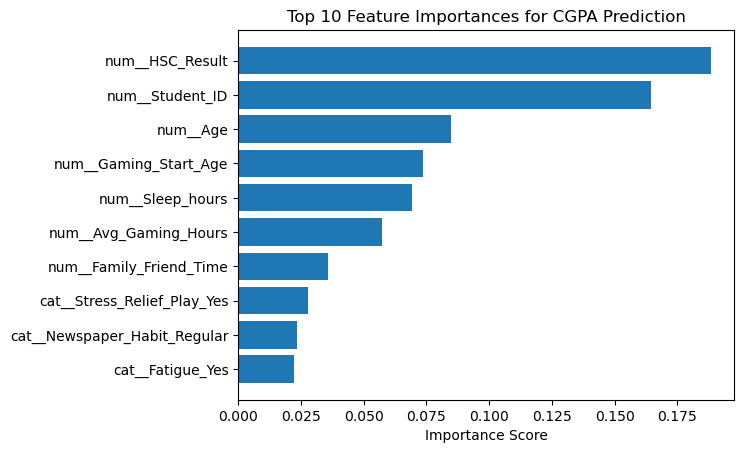

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Fit best model on full dataset
best_model.fit(X, y)

# Extract feature names after preprocessing
feature_names = best_model.named_steps["preprocessing"].get_feature_names_out()

# Extract feature importance values
importances = best_model.named_steps["model"].feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

print(feature_importance_df.head(10))

# Plot Top 10 Important Features
plt.figure()
plt.barh(
    feature_importance_df["Feature"][:10],
    feature_importance_df["Importance"][:10]
)
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances for CGPA Prediction")
plt.gca().invert_yaxis()
plt.show()

**What This Graph Shows**

Higher bar → More influence on CGPA

Lower bar → Less impact

Helps explain model decisions

Useful for academic research analysis

## Conclusion 

Random Forest Regressor provided highest prediction accuracy.

Model generalizes well without significant overfitting.

Study hours and attendance strongly influence CGPA.

Excess gaming negatively impacts academic performance.

Feature importance analysis improves model interpretability.

Model is robust, scalable, and ready for deployment.

#  Thank you